In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
project_path = os.getcwd()
df_raw = pd.read_csv(project_path+"/spotify.csv", sep=";", index_col="id")
print('DF RawData length: ', len(df_raw))
df_main = df_raw.copy()
print('DF MAIN length: ', len(df_main))

DF RawData length:  1556
DF MAIN length:  1556


In [3]:
df_main.head()

,music,countplay,followers,streams,popularity,dance,energy,loudness,speechiness,acousticness,liveness,time,durationms,valence
id,,,,,,,,,,,,,,
1,Beggin',8,3377762.0,48633449,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589
2,STAY (with Justin Bieber),3,2230022.0,47248719,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478
3,good 4 u,11,6266514.0,40162559,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688
4,Bad Habits,5,83293380.0,37799456,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591
5,INDUSTRY BABY (feat. Jack Harlow),1,5473565.0,33948454,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894


In [4]:
df_main.drop(columns="countplay", inplace=True)
df_main.head()

,music,followers,streams,popularity,dance,energy,loudness,speechiness,acousticness,liveness,time,durationms,valence
id,,,,,,,,,,,,,
1,Beggin',3377762.0,48633449,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589
2,STAY (with Justin Bieber),2230022.0,47248719,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478
3,good 4 u,6266514.0,40162559,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688
4,Bad Habits,83293380.0,37799456,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591
5,INDUSTRY BABY (feat. Jack Harlow),5473565.0,33948454,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894


In [5]:
df_main.describe()

,followers,streams,popularity,dance,energy,loudness,speechiness,acousticness,liveness,time,durationms,valence
count,1.545000e+03,1.556000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,1.471690e+07,6.340219e+06,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704
std,1.667579e+07,3.369479e+06,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326
min,4.883000e+03,4.176083e+06,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000
25%,2.123734e+06,4.915322e+06,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000
50%,6.852509e+06,5.275748e+06,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000
75%,2.269875e+07,6.455044e+06,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000
max,8.333778e+07,4.863345e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


In [14]:
df_corr = df_main.corr()
df_corr

,followers,streams,popularity,dance,energy,loudness,speechiness,acousticness,liveness,time,durationms,valence
followers,1.000000,0.103251,0.104358,-0.097576,-0.065613,-0.033264,-0.072968,0.023830,-0.012491,-0.019881,0.142145,-0.108804
streams,0.103251,1.000000,0.123184,-0.081291,0.004145,-0.031155,-0.062620,0.034054,0.042105,0.053458,0.015964,0.038381
popularity,0.104358,0.123184,1.000000,0.028435,0.094691,0.158767,-0.032091,-0.091245,-0.029460,-0.024951,0.082096,-0.000953
dance,-0.097576,-0.081291,0.028435,1.000000,0.142130,0.234928,0.237394,-0.316798,-0.114518,-0.040219,-0.101390,0.361627
energy,-0.065613,0.004145,0.094691,0.142130,1.000000,0.732616,0.023989,-0.542399,0.124693,0.113352,0.056624,0.356325
loudness,-0.033264,-0.031155,0.158767,0.234928,0.732616,1.000000,-0.018823,-0.477431,0.043141,0.104371,0.075262,0.298762
speechiness,-0.072968,-0.062620,-0.032091,0.237394,0.023989,-0.018823,1.000000,-0.131436,0.072774,0.111255,-0.089895,0.038032
acousticness,0.023830,0.034054,-0.091245,-0.316798,-0.542399,-0.477431,-0.131436,1.000000,-0.005469,-0.061632,-0.046010,-0.096997
liveness,-0.012491,0.042105,-0.029460,-0.114518,0.124693,0.043141,0.072774,-0.005469,1.000000,-0.018265,0.019685,0.007882
time,-0.019881,0.053458,-0.024951,-0.040219,0.113352,0.104371,0.111255,-0.061632,-0.018265,1.000000,-0.004671,0.057563


<AxesSubplot:>

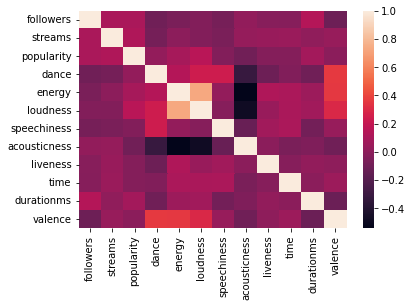

In [15]:
sns.heatmap(df_corr)

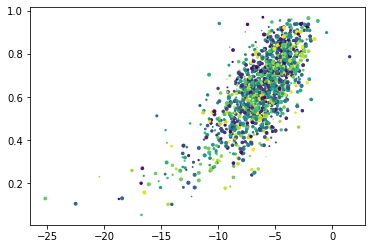

In [40]:
area = (10 * np.random.rand(1556))
colors = np.random.rand(1556)
plt.scatter(df_main["loudness"], df_main["energy"], s=area, c=colors)

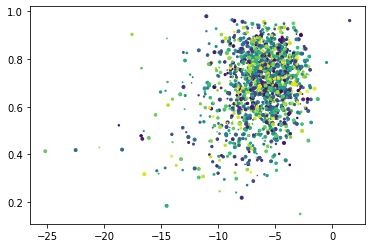

In [44]:
plt.scatter(df_main["loudness"], df_main["dance"], s=area, c=colors)

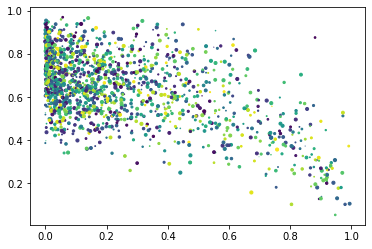

In [47]:
plt.scatter(df_main["acousticness"], df_main["energy"], s=area, c=colors)